# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [4]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [5]:
my_vacancy = ['шеф-повар', 'доставщик', 'няня', 'столяр', 'уборщик']
dict_my_vacancy = {'шеф-повар':{'data':[], 'count_of_page':0},
                   'доставщик':{'data':[], 'count_of_page':0},
                   'няня':{'data':[], 'count_of_page':0},
                   'столяр':{'data':[], 'count_of_page':0},
                   'уборщик':{'data':[], 'count_of_page':0}
                  }

for job in my_vacancy:
  cur_params = {
    'text': job,
    'area': 1,
    'page': 0,
    'per_page': 100
  }
  cur_data = requests.get(URL, cur_params).json()
  sleep(0.1)
  dict_my_vacancy[job]['count_of_page'] = cur_data['pages']

In [7]:
for job in my_vacancy:
  for page in range(dict_my_vacancy[job]['count_of_page']):
    cur_params = {
        'text': job,
        'area': 1,
        'page': page,
        'per_page': 100
    }
    cur_data = requests.get(URL,cur_params).json()
    sleep(0.05)
    dict_my_vacancy[job]['data'] += cur_data['items']

In [13]:
[dict_my_vacancy[key]['data'][i]['name'] for key in my_vacancy for i in range(len(dict_my_vacancy[key]['data']))]

['Шеф-повар (личный шеф-повар)',
 'Шеф-повар',
 'Шеф-повар',
 'Шеф-повар',
 'Шеф - повар',
 'Шеф-повар',
 'Шеф-повар в успешный рыбный ресторан',
 'Менеджер в ресторан ГВИДОН',
 'Помощник официанта в ресторан "Сахалин"',
 'Шеф-повар',
 'Шеф-повар',
 'Шеф-повар (VIP)',
 'Су-шеф в ресторан Рыба Моя',
 'Менеджер ресторана',
 'Су-шеф / старший повар на смене',
 'Шеф-повар',
 'Старший менеджер с функциями управляющего в ресторан',
 'Шеф-повар',
 'Шеф-повар',
 'Технический директор',
 'Личный повар в VIP семью',
 'Шеф-повар',
 'Шеф-повар в Международную Школу',
 'Официант в ресторан "Сахалин "',
 'Шеф-повар',
 'Начальник производства / Шеф повар',
 'Повар 4500',
 'Хостес в ресторан "She" на Большую Никитскую',
 'Аналитик',
 'Шеф-повар',
 'Шеф-повар в столовую частной школы',
 'Менеджер по работе с премиальными клиентами/Concierge',
 'Бренд-шеф сети отелей',
 'Повар в ресторан (4200 руб. за смену)',
 'Официант в ресторан "She" (на Большой Никитской)',
 'Менеджер по продажам',
 'Шеф-повар',
 '

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
count_all_vacancy = 0
for job in my_vacancy:
  count_all_vacancy += len(dict_my_vacancy[job]['data'])
count_all_vacancy

3568

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
  def __init__(self, name_of_company, latitude=None, longitude=None):
    self.name_of_company = name_of_company
    self.latitude = latitude
    self.longitude = longitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = []
for job in my_vacancy:
  for i in range(len(dict_my_vacancy[job]['data'])):
    temp = dict_my_vacancy[job]['data'][i]
    address = temp.get('address')
    if address is not None:
      latitude = address.get('lat')
      longitude = address.get('lng')
      companies.append(Company(temp['employer']['name'], latitude, longitude))
    else:
      companies.append(Company(temp['employer']['name']))

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
companies_with_coordinate = [comp for comp in companies if comp.latitude is not None]
len(companies_with_coordinate)

2369

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
lat_center, long_center = 55.75406644507022, 37.62128056532965
lat_mkad, long_mkad = 55.855703771515316, 37.77934929983793
radius_2 = (lat_center - lat_mkad)**2 + (long_center - long_mkad)**2

companies_into_mrr = []
for comp in companies_with_coordinate:
  if (comp.latitude - lat_center)**2 + (comp.longitude - long_center)**2 < radius_2:
    companies_into_mrr.append(comp)
len(companies_into_mrr)

1832

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

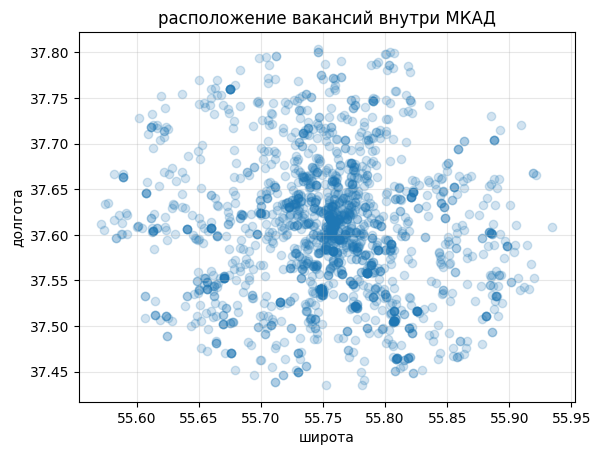

In [ ]:
x = [comp.latitude for comp in companies_into_mrr]
y = [comp.longitude for comp in companies_into_mrr]
plt.scatter(x, y, alpha=0.2,)
plt.title("расположение вакансий внутри МКАД")
plt.xlabel("широта")
plt.ylabel("долгота")
plt.grid(alpha=0.3)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(lat=x, lon=y, opacity=0.5, zoom=9, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Во первых, хочется отметить, что спрос на вакансии растет с приближением от МКАДа к центру москвы. 
Во вторых, спрос в москве за пределами мкада мееньше 20% процентов от всего спроса в москве. Также хочеться отметить, что достаточно большая часть компаний (около трети) не указывает свои адреса, так, что говоря о статистики, стоит учитыва

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [2]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 50.2MB/s]


Создадим DataFrame:

In [3]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [17]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
index_of_max_price = int(diamonds['total_sales_price'].idxmax())
print('{} - {}'.format(index_of_max_price, diamonds['total_sales_price'][index_of_max_price]))

index_of_min_price = int(diamonds['total_sales_price'].idxmin())
print('{} - {}'.format(index_of_min_price, diamonds['total_sales_price'][index_of_min_price]))

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
missing_data = ((diamonds == 'unknown')|(diamonds.isnull())).sum()
missing_data.sum()

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
missing_data[missing_data > 0].index.tolist()

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [4]:
non_informative_idxs = diamonds.columns.str.startswith('fancy_color_')|diamonds.columns.str.startswith('fluor_')
sum(non_informative_idxs)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [5]:
non_informative_data = diamonds.loc[:, non_informative_idxs] 
((non_informative_data != 'unknown') & non_informative_data.notnull()).sum().sum()

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [6]:
diamonds.drop(columns=non_informative_data.columns.tolist(), inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [7]:
culet_indexes = diamonds.columns.str.startswith('culet_')
print(sum(culet_indexes))

non_informative_data_culet = diamonds.loc[:, culet_indexes]
print(((non_informative_data_culet != 'unknown') & non_informative_data_culet.notnull()).sum().sum())

diamonds.drop(columns=non_informative_data_culet.columns.tolist(), inplace=True)

2
149282


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [9]:
diamonds['total_sales_price'].sum() // 1_000

1517721

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [10]:
diamonds[diamonds.index % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [11]:
diamonds[diamonds.index % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [15]:
diamonds.loc[:, diamonds.dtypes == 'object']

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [23]:
prise_diamonds_column = diamonds['total_sales_price'].values[:5]
res = np.outer(np.transpose(prise_diamonds_column), prise_diamonds_column)
print(res)

[[40000 40000 40000 40000 40000]
 [40000 40000 40000 40000 40000]
 [40000 40000 40000 40000 40000]
 [40000 40000 40000 40000 40000]
 [40000 40000 40000 40000 40000]]


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [ ]:
t1 = diamonds[['color', 'total_sales_price']]
t1 = t1[((t1 != 'unknown') & (t1.notnull()))]

t1_mean = t1.groupby('color', as_index=False).agg('mean')
t1_med = t1.groupby('color', as_index=False).agg('median')

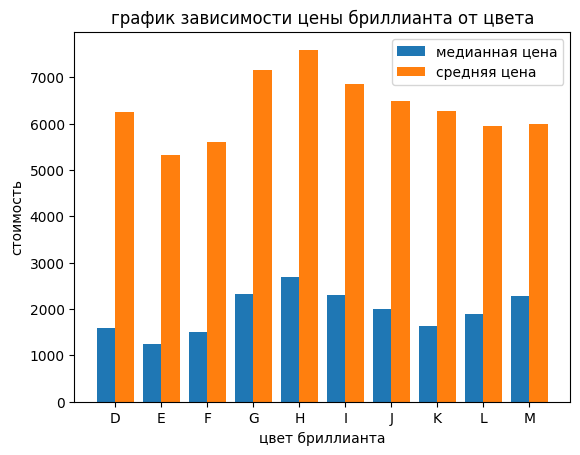

In [ ]:
X = list(t1_med['color'])
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, t1_med['total_sales_price'], 0.4, label='медианная цена')
plt.bar(X_axis + 0.2, t1_mean['total_sales_price'], 0.4 ,label='средняя цена')

plt.xticks(X_axis, X)
plt.title("график зависимости цены бриллианта от цвета")
plt.legend()
plt.xlabel("цвет бриллианта")
plt.ylabel("стоимость")
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

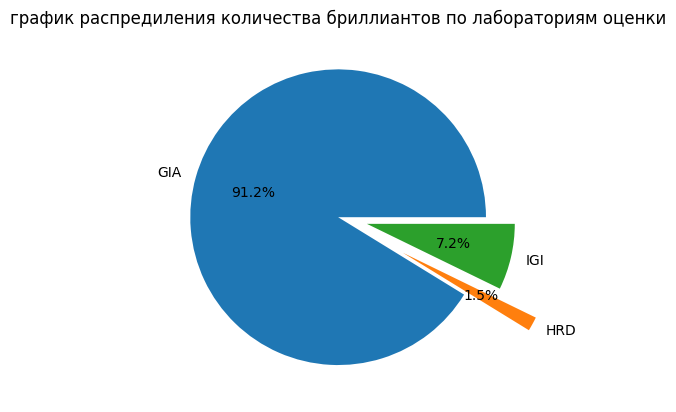

In [ ]:
t2 = diamonds[['lab']]
t2 = t2[((t2 != 'unknown') & (t2.notnull()))]

t2['count'] = 1
t2_count = t2.groupby('lab', as_index=False).agg('count')

labels = list(t2_count['lab'])
sizes = list(t2_count['count'])
explode = (0, 0.5, 0.2)

fig, ax = plt.subplots()
ax.set_title("график распредиления количества бриллиантов по лабораториям оценки")
ax.pie(sizes, labels=labels, explode=explode ,autopct='%1.1f%%')

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

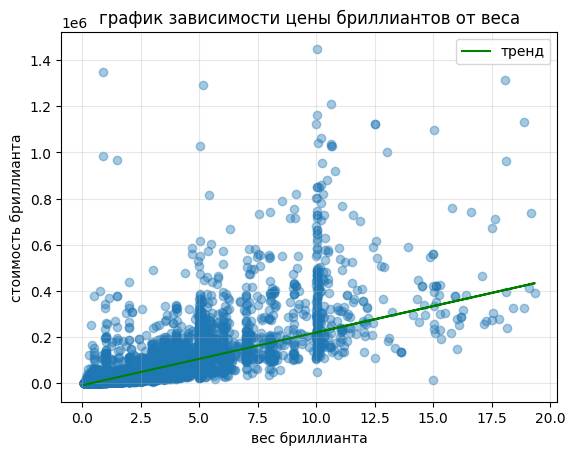

In [ ]:
t3 = diamonds[['carat_weight', 'total_sales_price']]
t3 = t3[t3.notnull()]
x = t3['carat_weight']
y = t3['total_sales_price']
plt.scatter(x, y, alpha=0.4)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'g-', label='тренд')
plt.title("график зависимости цены бриллиантов от веса")
plt.legend()
plt.xlabel("вес бриллианта")
plt.ylabel("стоимость бриллианта")
plt.grid(alpha=0.3)
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [ ]:
t4 = diamonds[['cut_quality']]
t4 = t4[((t4 != 'unknown') & (t4.notnull()))]

t4['count'] = 1
t4_count = t4.groupby('cut_quality', as_index=False).agg('count')

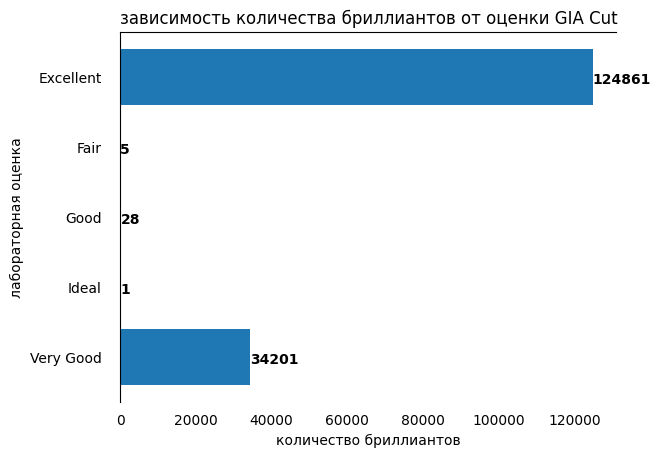

In [ ]:
fig, ax = plt.subplots()
ax.barh(t4_count['cut_quality'], t4_count['count'])

for s in ['bottom', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')

ax.set_title('зависимость количества бриллиантов от оценки GIA Cut',
             loc ='left', )
ax.set_xlabel('количество бриллиантов')
ax.set_ylabel('лабораторная оценка')

plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

#выводы
Из анализа датасета бриллиантов можно сделать вывод, что существует явная зависимость между ценой бриллианта и его весом. Более тяжелые бриллианты имеют более высокую цену, что подтверждается статистическими данными. Кроме того, можно отметить, что характеристики бриллиантов, такие как цвет, чистота и размер, также оказывают влияние на цену. Эти факторы могут быть использованы для определения стоимости бриллиантов и принятия решений в индустрии ювелирных изделий.

##конкретные замечания по каждому графику:
###1) зависимость стоимости от цвета:
Цвет бриллианта оказывает влияние на его цену,однако, другие факторы, такие как вес и размер, могут оказывать более существенное влияние на стоимость бриллианта.
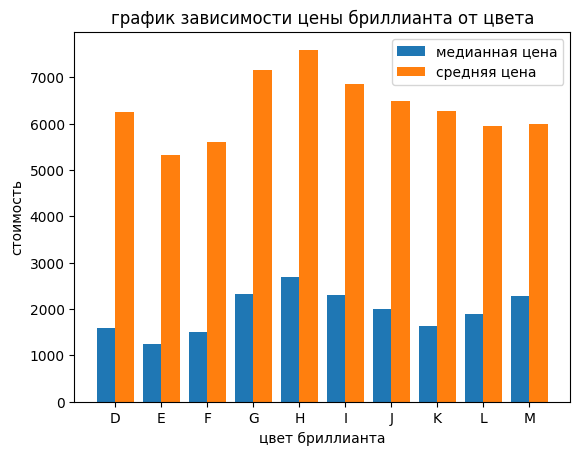
###2)лабараторная оценка - кол-во бриллиантов
наимение информативный график, из него можно получить лишь данные о том какое количество бриллиантов оценивалось в каждой из лаьораторий. По ней можно понять какая лаборатория внесла наибольший вклад для данных из датасета.
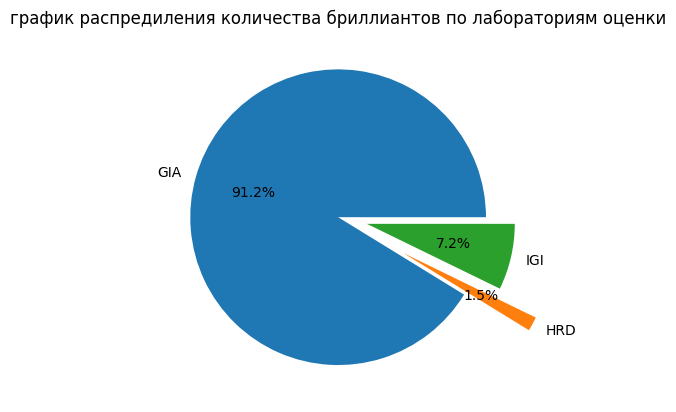
###3) зависимость цены от веса
 Вес является одним из самых важных факторов, влияющих на цену бриллианта, и существует почти линейная зависимость между весом и ценой. Однако, есть некоторые бриллианты, которые выбиваются из общей массы и могут иметь более высокую цену, несмотря на свой вес.
 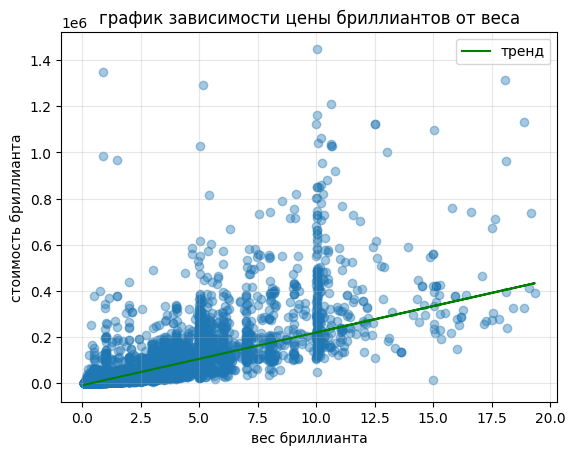
###4) оценка Gia cut - количество бриллиантов
Распространение бриллиантов по оценке Gia cut является довольно однозначным, с большинством бриллиантов имеющих оценки Excellent и Very Good, и лишь небольшое количество бриллиантов с оценками Fair, Good и Ideal. Это свидетельствует о том, что большинство производителей стремятся создавать высококачественные бриллианты с отличным ограном.
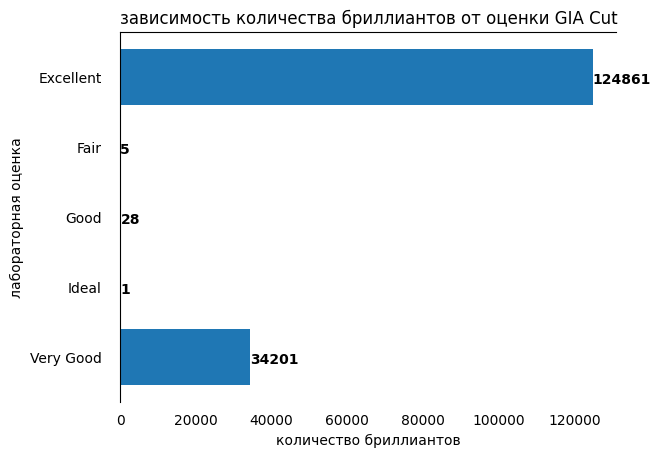

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [9]:
ml_dataset = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
ml_dataset.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [10]:
shafled = ml_dataset.sample(frac=0.1)
shafled

,meas_length,meas_width,meas_depth,total_sales_price
129303,5.02,5.06,3.12,2836
200371,7.55,7.66,4.77,16451
102925,4.89,4.92,3.07,1688
76534,4.40,4.41,2.77,1114
64021,4.45,4.48,2.70,1012
...,...,...,...,...
132333,5.23,5.25,3.31,2994
123844,5.57,5.59,3.32,2540
125903,4.99,5.70,3.17,2682
114511,4.94,4.99,3.06,2208


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [12]:
shafled['minkovski_sum'] = (abs(shafled['meas_length'] - shafled['meas_width'])**3 + 
                            abs(shafled['meas_length'] - shafled['meas_depth'])**3 +
                            abs(shafled['meas_depth'] - shafled['meas_width'])**3)**(1./3)#shafled['meas_width']**3 + shafled['meas_depth']**3)**(1./3)
shafled

,meas_length,meas_width,meas_depth,total_sales_price,minkovski_sum
129303,5.02,5.06,3.12,2836,2.419315
200371,7.55,7.66,4.77,16451,3.573255
102925,4.89,4.92,3.07,1688,2.312111
76534,4.40,4.41,2.77,1114,2.059990
64021,4.45,4.48,2.70,1012,2.223923
...,...,...,...,...,...
132333,5.23,5.25,3.31,2994,2.431713
123844,5.57,5.59,3.32,2540,2.847478
125903,4.99,5.70,3.17,2682,2.826482
114511,4.94,4.99,3.06,2208,2.400570


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [13]:
ml_dataset_2 = shafled[['minkovski_sum' ,'total_sales_price']]
ml_dataset_2

,minkovski_sum,total_sales_price
129303,2.419315,2836
200371,3.573255,16451
102925,2.312111,1688
76534,2.059990,1114
64021,2.223923,1012
...,...,...
132333,2.431713,2994
123844,2.847478,2540
125903,2.826482,2682
114511,2.400570,2208


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [14]:
dataset_size = len(ml_dataset_2)
dataset_train = ml_dataset_2[:int(0.8 * dataset_size)]
dataset_test = ml_dataset_2[int(0.8 * dataset_size):]

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

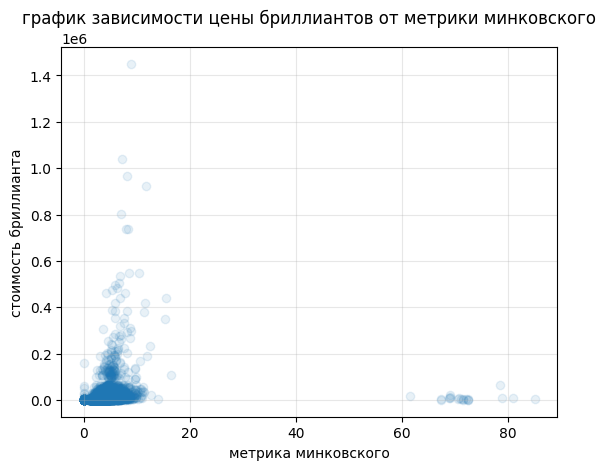

In [15]:
t4 = dataset_train[['minkovski_sum', 'total_sales_price']]
t4 = t4[t4.notnull()]
x = t4['minkovski_sum']
y = t4['total_sales_price']
plt.scatter(x, y, alpha=0.1)
plt.title("график зависимости цены бриллиантов от метрики минковского")
plt.xlabel("метрика минковского")
plt.ylabel("стоимость бриллианта")
plt.grid(alpha=0.3)
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

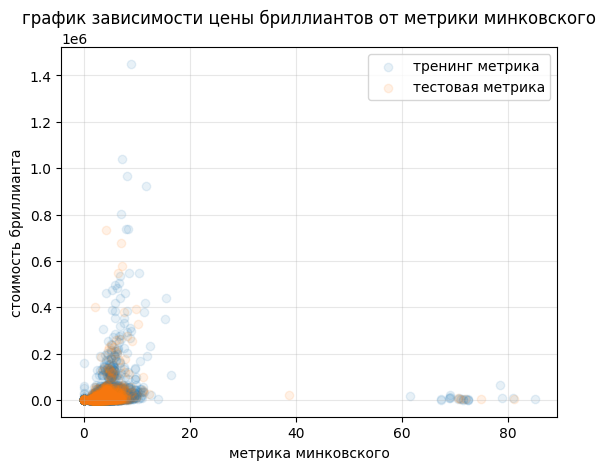

In [16]:
t4 = dataset_test[['minkovski_sum', 'total_sales_price']]
t4 = t4[t4.notnull()]
x_test = t4['minkovski_sum']
y_test = t4['total_sales_price']

plt.scatter(x, y, alpha=0.1, )
plt.scatter(x_test, y_test, alpha=0.1)
plt.title("график зависимости цены бриллиантов от метрики минковского")
plt.xlabel("метрика минковского")
plt.ylabel("стоимость бриллианта")
plt.legend(['тренинг метрика', 'тестовая метрика'])
plt.grid(alpha=0.3)
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [17]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=1).fit(dataset_train['minkovski_sum'].values.reshape(-1, 1))
distances, indices = nbrs.kneighbors(dataset_test['minkovski_sum'].values.reshape(-1, 1))
indices

array([[ 3359],
       [ 5527],
       [ 1443],
       ...,
       [11048],
       [ 2579],
       [10695]])

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [18]:
y_true = dataset_test['total_sales_price'].values
y_predicted = dataset_train['total_sales_price'].values[indices[:, 0]]

percent = (abs(y_true - y_predicted)) / y_true * 100
print(percent)
print(percent.mean())

[27.13178295 22.54132979  7.83898305 ...  0.         41.0326087
 44.53125   ]
154.39132193463405


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [25]:
from sklearn.preprocessing import OneHotEncoder

df = diamonds.loc[:, (diamonds.dtypes == 'object')|(diamonds.columns == 'total_sales_price')]

selected_cols = ['symmetry', 'cut_quality']

two_column_df = df[selected_cols + ['total_sales_price']]
two_column_df = two_column_df[(two_column_df != 'unknown')&(two_column_df.notnull())]
enc = OneHotEncoder(handle_unknown='ignore')

df_values = enc.fit_transform(two_column_df[selected_cols]).toarray()
df_target = two_column_df['total_sales_price'].values

In [26]:
two_column_df.shape[0]

219703

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_values, df_target, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(175762, 11) (43941, 11)


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [28]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [29]:
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)

mean_squared_error(y_test, y_pred)

763468662.8812913

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)